##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


## This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [0]:
%%capture
# Install the latest Tensorflow version.sentence
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [19]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [25]:
#@title Compute a representation for each sentence, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
sentences = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

sentence_embeddings = embed(sentences)

for i, sentence_embedding in enumerate(np.array(sentence_embeddings).tolist()):
  print("Sentences: {}".format(sentences[i]))
  print("Embedding size: {}".format(len(sentence_embedding)))
  sentence_embedding_snippet = ", ".join(
      (str(x) for x in sentence_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(sentence_embedding_snippet))

Sentences: Elephant
Embedding size: 512
Embedding: [-0.034585610032081604, -0.017990106716752052, 0.0019805808551609516, ...]

Sentences: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.058333925902843475, -0.08185010403394699, 0.06890939921140671, ...]

Sentences: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.026461757719516754, -0.01911565102636814, -0.04207039251923561, ...]



# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [0]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(sentences_):
  sentence_embeddings_ = embed(sentences_)
  plot_similarity(sentences_, sentence_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

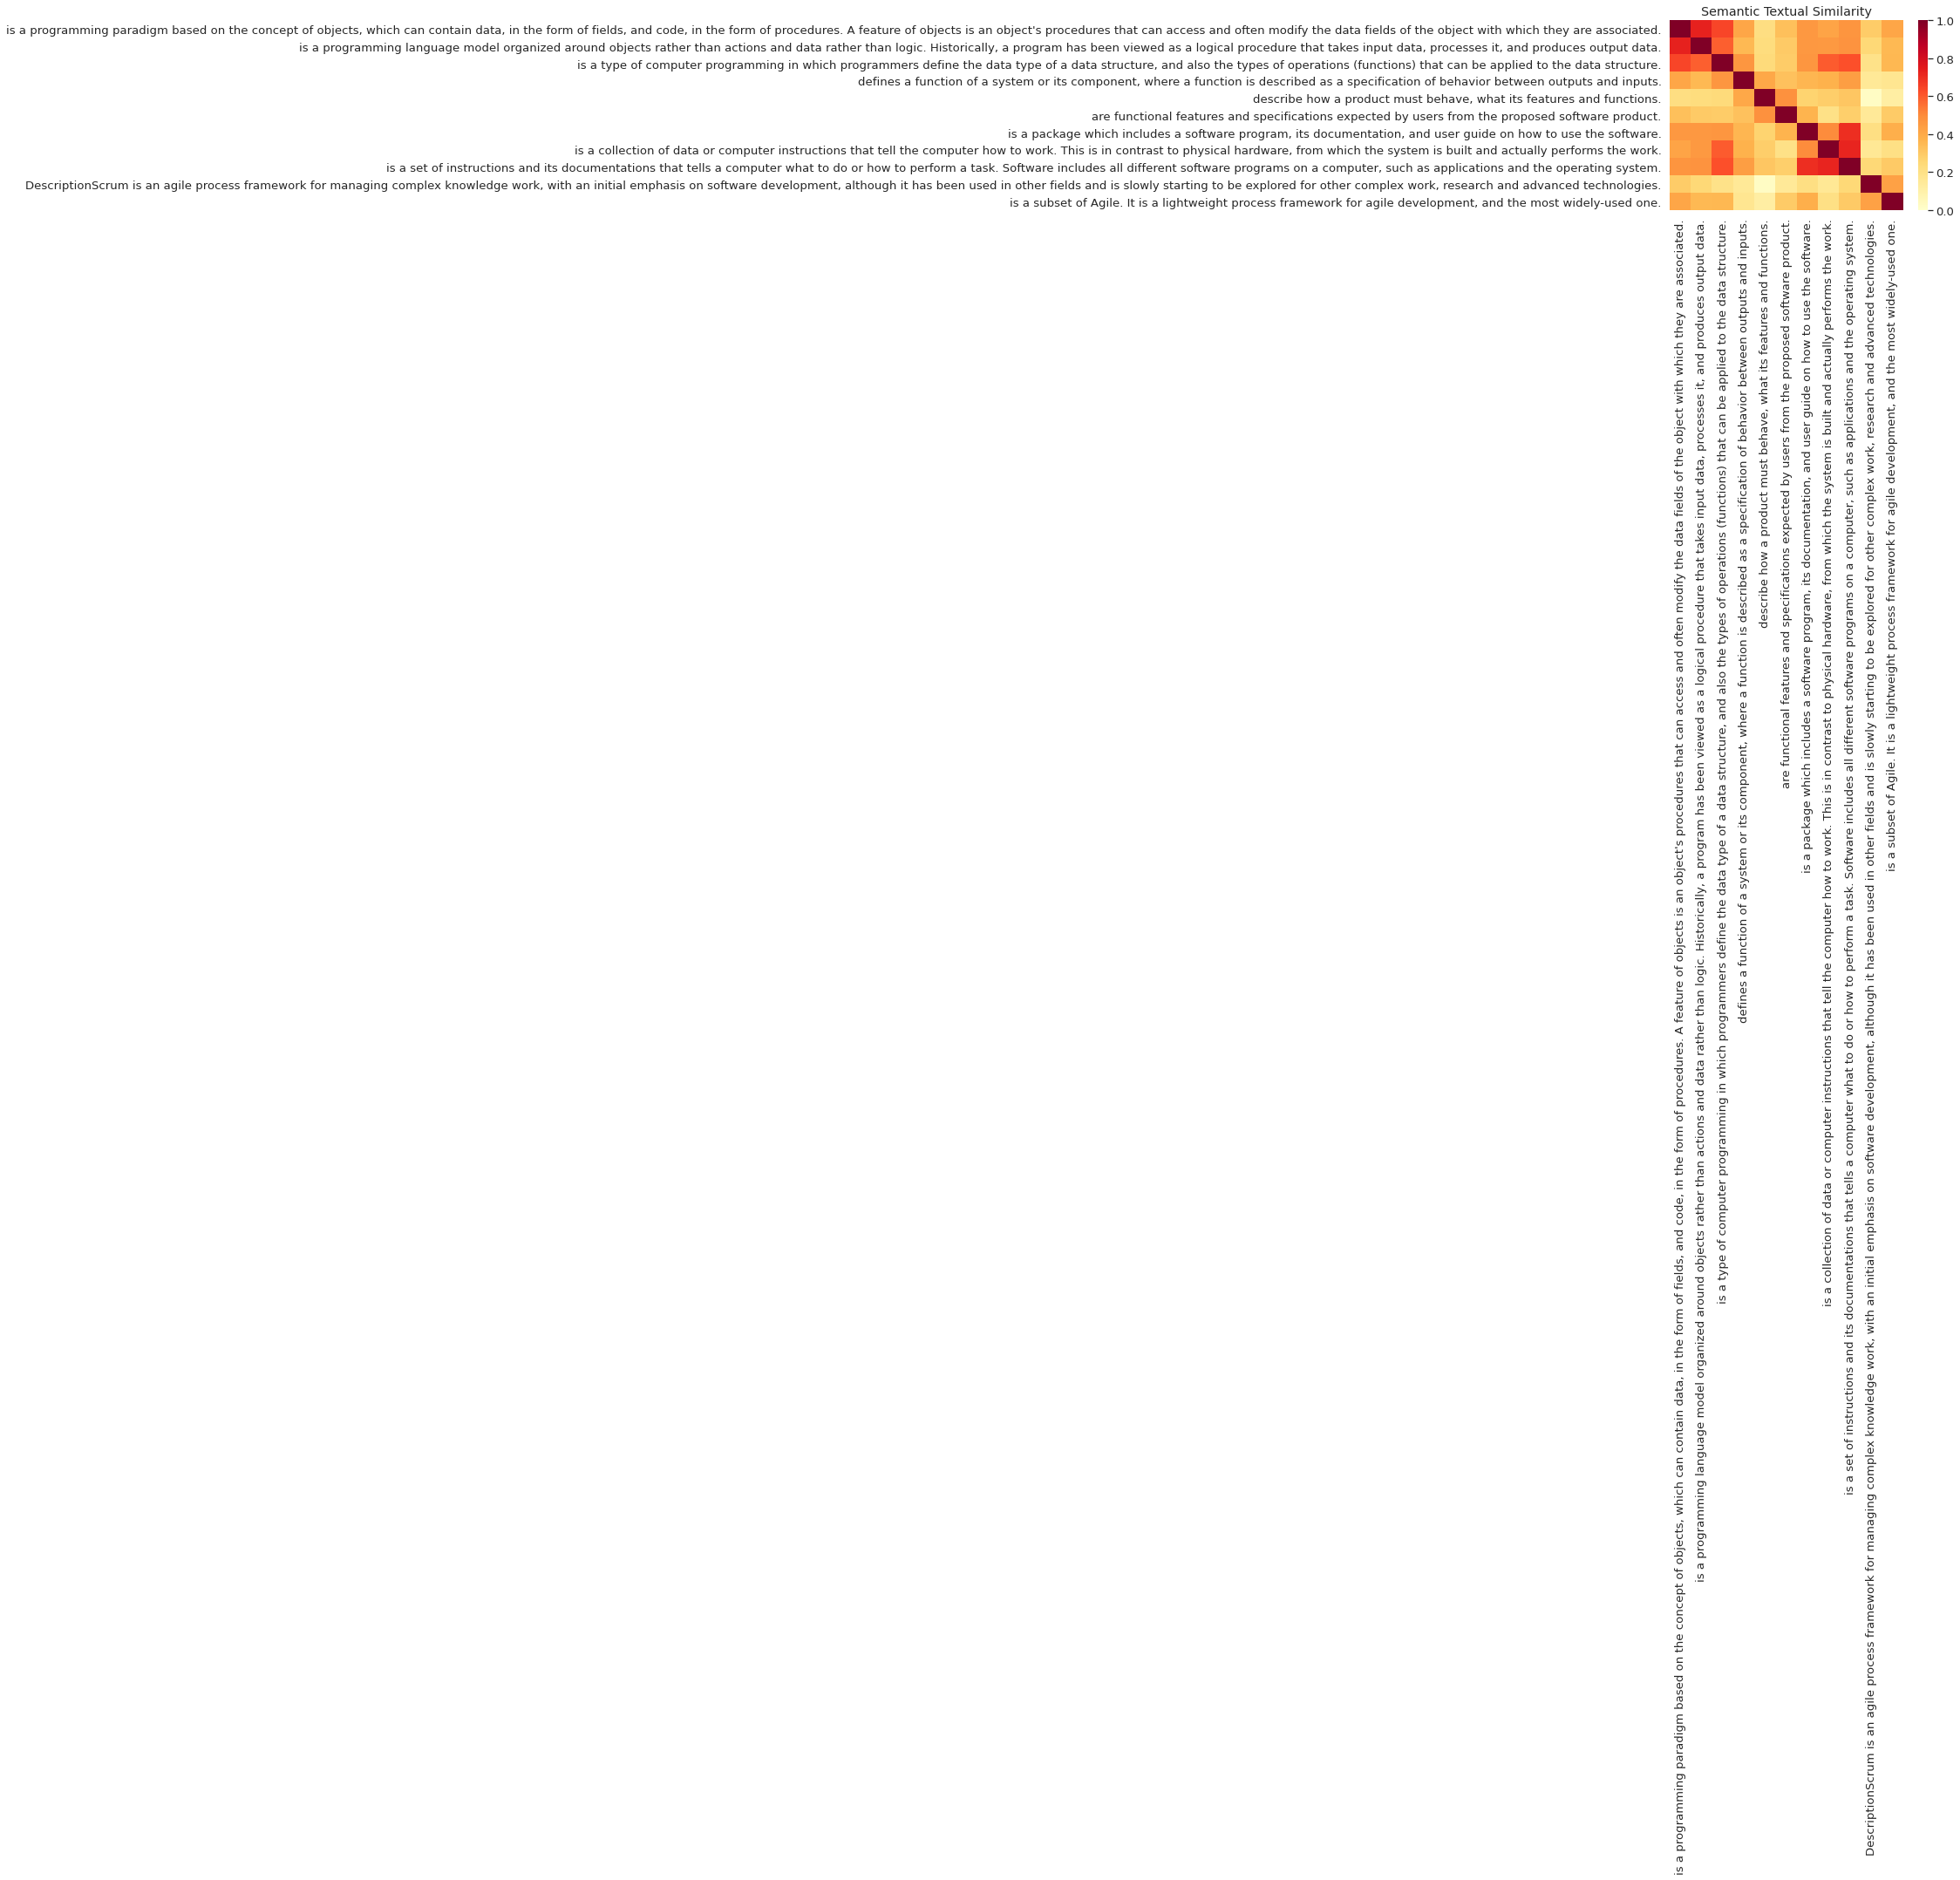

In [22]:
sentences = [
    # what is oop?
    "is a programming paradigm based on the concept of objects, which can contain data, in the form of fields, and code, in the form of procedures. A feature of objects is an object's procedures that can access and often modify the data fields of the object with which they are associated.",
    "is a programming language model organized around objects rather than actions and data rather than logic. Historically, a program has been viewed as a logical procedure that takes input data, processes it, and produces output data.",
    "is a type of computer programming in which programmers define the data type of a data structure, and also the types of operations (functions) that can be applied to the data structure.",

    # What is function requirments?
    "defines a function of a system or its component, where a function is described as a specification of behavior between outputs and inputs.",
    "describe how a product must behave, what its features and functions.",
    "are functional features and specifications expected by users from the proposed software product.",

    # What is computer software?
    "is a package which includes a software program, its documentation, and user guide on how to use the software.",
    "is a collection of data or computer instructions that tell the computer how to work. This is in contrast to physical hardware, from which the system is built and actually performs the work.",
    "is a set of instructions and its documentations that tells a computer what to do or how to perform a task. Software includes all different software programs on a computer, such as applications and the operating system.",

    # What Is Agile Scrum?
    "DescriptionScrum is an agile process framework for managing complex knowledge work, with an initial emphasis on software development, although it has been used in other fields and is slowly starting to be explored for other complex work, research and advanced technologies.",
    "is a subset of Agile. It is a lightweight process framework for agile development, and the most widely-used one.",
]

run_and_plot(sentences)
               

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Download data

In [0]:
# import pandas
# import scipy
# import math
# import csv

# sts_dataset = tf.keras.utils.get_file(
#     fname="Stsbenchmark.tar.gz",
#     origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
#     extract=True)
# sts_dev = pandas.read_table(
#     os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"),
#     error_bad_lines=False,
#     skip_blank_lines=True,
#     usecols=[4, 5, 6],
#     names=["sim", "sent_1", "sent_2"])
# sts_test = pandas.read_table(
#     os.path.join(
#         os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"),
#     error_bad_lines=False,
#     quoting=csv.QUOTE_NONE,
#     skip_blank_lines=True,
#     usecols=[4, 5, 6],
#     names=["sim", "sent_1", "sent_2"])
# # cleanup some NaN values in sts_dev
# sts_dev = sts_dev[[isinstance(s, str) for s in sts_dev['sent_2']]]

### Evaluate Sentence Embeddings

In [0]:
# sts_data = sts_dev #@param ["sts_dev", "sts_test"] {type:"raw"}

# def run_sts_benchmark(batch):
#   sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_1'].tolist())), axis=1)
#   sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_2'].tolist())), axis=1)
#   cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
#   clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
#   scores = 1.0 - tf.acos(clip_cosine_similarities)
#   """Returns the similarity scores"""
#   return scores

# dev_scores = sts_data['sim'].tolist()
# scores = []
# for batch in np.array_split(sts_data, 10):
#   scores.extend(run_sts_benchmark(batch))

# pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
# print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
#     pearson_correlation[0], pearson_correlation[1]))